In [11]:
from io import StringIO
from collections import OrderedDict
import numpy as np
import cvxpy as cp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
plt.rc('mathtext', fontset="cm")
import matplotlib.ticker as mtick
import os
import re

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import sys
import matplotlib
import scipy
from matplotlib import cm # Colormaps
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import time

sns.set_style('whitegrid')
sns.set_context("talk")

In [13]:
def log_law(y, k, B):
    return (1/k)*np.log(y) + B

def func_g_extreme(y,C,D):
    return C*y**(1/12)+D*y**(1/6)

def func_plus_variables_extreme(y,C,D,retau):
    return C*y**(1/12) + (D/(retau**(1/12)))*y**(1/6)

def func_kolmo_0derivative(y,C,E):
    return C*( y**(1/12) - (1/2)*y**(1/6) ) + E*( y**(4/39) - (8/13)*y**(1/6) )

def func_b(y,C,retau):
    return C*y**(1/12)

def func_kolmo(y,C,D,E):
    return C*y**(1/12) + D*y**(1/6) + E*y**(4/39)

def func_kolmo_meso(y,D,E):
    return D*y**(1/6) + E*y**(4/39)

def func_kolmo_viscous(y,C,E):
    return C*y**(1/12) + E*y**(4/39)

def func_random(y, C, D, alpha, beta):
    return C*y**alpha + D*y**beta

def func_random_mono(y, C, gamma):
    return C*y**gamma

def make_gabriel_matrix_extreme(y__):
    matrix=[]
    for y in y__:
        matrix.append([y**(1/12),y**(1/6)])
    A=np.vstack(matrix)
    return A

def make_gabriel_matrix_extreme_kolmo(y__):
    matrix=[]
    for y in y__:
        matrix.append([y**(1/12),y**(1/6),y**(4/39)])
    A=np.vstack(matrix)
    return A

def make_gabriel_matrix_extreme_kolmo_meso(y__):
    matrix=[]
    for y in y__:
        matrix.append([y**(1/6),y**(4/39)])
    A=np.vstack(matrix)
    return A

def make_gabriel_matrix_extreme_kolmo_viscous(y__):
    matrix=[]
    for y in y__:
        matrix.append([y**(1/12),y**(4/39)])
    A=np.vstack(matrix)
    return A

def make_gabriel_matrix_kolmo_0derivative(y__):
    matrix=[]
    for y in y__:
        matrix.append([y**(1/12) - (1/2)*y**(1/6), y**(4/39) - (8/13)*y**(1/6)])
    A=np.vstack(matrix)
    return A

def make_gabriel_matrix_extreme_mono(y__):
    matrix=[]
    for y in y__:
        matrix.append([y**(1/12)])
    A=np.vstack(matrix)
    return A

def make_gabriel_matrix_random(y__,alpha,beta):
    matrix = []
    for y in y__:
        matrix.append([y**alpha,y**beta])
    A = np.vstack(matrix)
    return (A)

def make_gabriel_matrix_random_mono(y__):
    matrix = []
    for y in y__:
        matrix.append([np.log(y), 1])
    A = np.vstack(matrix)
    return (A)

## Import the Corrected McKeon Data

In [14]:
dfSB75k_M=pd.read_csv("../Sean Bailey Data/Data for Sharing/McKeon Data/turb2/Re75000.txt", sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB150k_M=pd.read_csv("../Sean Bailey Data/Data for Sharing/McKeon Data/turb2/Re150000.txt", sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB230k_M=pd.read_csv("../Sean Bailey Data/Data for Sharing/McKeon Data/turb2/Re230000.txt", sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB310k_M=pd.read_csv("../Sean Bailey Data/Data for Sharing/McKeon Data/turb2/Re310000.txt", sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB410k_M=pd.read_csv("../Sean Bailey Data/Data for Sharing/McKeon Data/turb2/Re410000.txt", sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB540k_M=pd.read_csv("../Sean Bailey Data/Data for Sharing/McKeon Data/turb2/Re540000.txt", sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB750k_M=pd.read_csv("../Sean Bailey Data/Data for Sharing/McKeon Data/turb2/Re750000.txt", sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB1M_M=pd.read_csv("../Sean Bailey Data/Data for Sharing/McKeon Data/turb2/Re1000000.txt", sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB1M300k_M=pd.read_csv("../Sean Bailey Data/Data for Sharing/McKeon Data/turb2/Re1300000.txt", sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB1M700k_M=pd.read_csv("../Sean Bailey Data/Data for Sharing/McKeon Data/turb2/Re1700000.txt", sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB2M300k_M=pd.read_csv("../Sean Bailey Data/Data for Sharing/McKeon Data/turb2/Re2300000.txt",  sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB3M_M=pd.read_csv("../Sean Bailey Data/Data for Sharing/McKeon Data/turb2/Re3000000.txt", sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB4M_M=pd.read_csv("../Sean Bailey Data/Data for Sharing/McKeon Data/turb2/Re4000000.txt", sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB6M_M=pd.read_csv("../Sean Bailey Data/Data for Sharing/McKeon Data/turb2/Re6000000.txt", sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB7M_M=pd.read_csv("../Sean Bailey Data/Data for Sharing/McKeon Data/turb2/Re7000000.txt", sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB10M_M=pd.read_csv("../Sean Bailey Data/Data for Sharing/McKeon Data/turb2/Re10000000.txt", sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB13M_M=pd.read_csv("../Sean Bailey Data/Data for Sharing/McKeon Data/turb2/Re13000000.txt", sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB18M_M=pd.read_csv("../Sean Bailey Data/Data for Sharing/McKeon Data/turb2/Re18000000.txt", sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])
dfSB35M_M=pd.read_csv("../Sean Bailey Data/Data for Sharing/McKeon Data/turb2/Re35000000.txt", sep="\t", header=None, names = ["datapoint", "y/R", "y+", "U+", "(U+-Ucl+)"])

In [15]:
scaling_factor_u = 0.03949403
scaling_factor_y = 0.66422105

re__=[]
re_tau=[]
yplus_=[]
y__=[]
uplus_= []
u__=[]
u_tau=[]
u_bar=[]
author=[]
reMck=[]

re75k = 7.43e+004
retau75k = 1824.7
utau = 4.320000e-001
ubar = 8.800400e+000
u = np.array(dfSB75k_M['U+'])*(utau/ubar)
uplus_.append(np.array(dfSB75k_M['U+']))
u_ = np.array(dfSB75k_M['U+'])/((retau75k)**(scaling_factor_u))
y_ = np.array(dfSB75k_M['y+']) / (retau75k ** scaling_factor_y)
yplus_.append(np.array(dfSB75k_M['y+']))
y__.append(y_)
u_bar.append(u)
u_tau.append(utau)
u__.append(u_)
re__.append(re75k)
reMck.append(re75k)
re_tau.append(retau75k)
author.append("McK")

re150k = 1.50e+005
retau150k = 3327.4
utau = 7.918500e-001
ubar = 1.720300e+001
u = np.array(dfSB150k_M['U+'])*(utau/ubar)
uplus_.append(np.array(dfSB150k_M['U+']))
u_ = np.array(dfSB150k_M['U+'])/((retau150k)**(scaling_factor_u))
y_ = np.array(dfSB150k_M['y+']) / (retau150k ** scaling_factor_y)
yplus_.append(np.array(dfSB150k_M['y+']))
y__.append(y_)
u__.append(u_)
u_bar.append(u)
u_tau.append(utau)
re__.append(re150k)
reMck.append(re150k)
re_tau.append(retau150k)
author.append("McK")

re230k = 2.30e+005
retau230k = 5108.6
utau = 4.183400e-001
ubar = 9.579900e+000
u = np.array(dfSB230k_M['U+'])*(utau/ubar)
uplus_.append(np.array(dfSB230k_M['U+']))
u_ = np.array(dfSB230k_M['U+'])/((retau230k)**(scaling_factor_u))
y_ = np.array(dfSB230k_M['y+']) / (retau230k ** scaling_factor_y)
yplus_.append(np.array(dfSB230k_M['y+']))
y__.append(y_)
u_bar.append(u)
u__.append(u_)
u_tau.append(utau)
re__.append(re230k)
reMck.append(re230k)
re_tau.append(retau230k)
author.append("McK")

re310k = 3.10e+005
retau310k = 6617.4
utau = 5.437000e-001
ubar = 1.272000e+001
u = np.array(dfSB310k_M['U+'])*(utau/ubar)
uplus_.append(np.array(dfSB310k_M['U+']))
u_ = np.array(dfSB310k_M['U+'])/((retau310k)**(scaling_factor_u))
y_ = np.array(dfSB310k_M['y+']) / (retau310k ** scaling_factor_y)
yplus_.append(np.array(dfSB310k_M['y+']))
y__.append(y_)
u_bar.append(u)
u_tau.append(utau)
u__.append(u_)
re__.append(re310k)
reMck.append(re310k)
re_tau.append(retau310k)
author.append("McK")

re410k = 4.11e+005
retau410k = 8536.6
utau = 7.034700e-001
ubar = 1.692900e+001
u = np.array(dfSB410k_M['U+'])*(utau/ubar)
uplus_.append(np.array(dfSB410k_M['U+']))
u_ = np.array(dfSB410k_M['U+'])/((retau410k)**(scaling_factor_u))
y_ = np.array(dfSB410k_M['y+']) / (retau410k ** scaling_factor_y)
yplus_.append(np.array(dfSB410k_M['y+']))
y__.append(y_)
u_tau.append(utau)
u_bar.append(u)
u__.append(u_)
re__.append(re410k)
reMck.append(re410k)
re_tau.append(retau410k)
author.append("McK")

re540k = 5.40e+005
retau540k = 10914.0
utau = 9.002800e-001
ubar = 2.214400e+001
u = np.array(dfSB540k_M['U+'])*(utau/ubar)
uplus_.append(np.array(dfSB540k_M['U+']))
u_ = np.array(dfSB540k_M['U+'])/((retau540k)**(scaling_factor_u))
y_ = np.array(dfSB540k_M['y+']) / (retau540k ** scaling_factor_y)
yplus_.append(np.array(dfSB540k_M['y+']))
y__.append(y_)
u_bar.append(u)
u__.append(u_)
u_tau.append(utau)
re__.append(re540k)
reMck.append(re540k)
re_tau.append(retau540k)
author.append("McK")

re750k = 7.50e+005
retau750k = 14849.0
utau = 2.423300e-001
ubar = 6.149100e+000
u = np.array(dfSB750k_M['U+'])*(utau/ubar)
uplus_.append(np.array(dfSB750k_M['U+']))
u_ = np.array(dfSB750k_M['U+'])/((retau750k)**(scaling_factor_u))
y_ = np.array(dfSB750k_M['y+']) / (retau750k ** scaling_factor_y)
yplus_.append(np.array(dfSB750k_M['y+']))
y__.append(y_)
u_bar.append(u)
u_tau.append(utau)
u__.append(u_)
re__.append(re750k)
reMck.append(re750k)
re_tau.append(retau750k)
author.append("McK")

re1M = 1.00e+006
retau1M = 19778.0
utau = 3.230300e-001
ubar = 8.419000e+000
u = np.array(dfSB1M_M['U+'])*(utau/ubar)
uplus_.append(np.array(dfSB1M_M['U+']))
u_ = np.array(dfSB1M_M['U+'])/((retau1M)**(scaling_factor_u))
y_ = np.array(dfSB1M_M['y+']) / (retau1M ** scaling_factor_y)
yplus_.append(np.array(dfSB1M_M['y+']))
y__.append(y_)
u_bar.append(u)
u__.append(u_)
u_tau.append(utau)
re__.append(re1M)
reMck.append(re1M)
re_tau.append(retau1M)
author.append("McK")

re1M300k = 1.35e+006
retau1M300k = 25278.0
utau = 4.136400e-001
ubar = 1.101400e+001
u = np.array(dfSB1M300k_M['U+'])*(utau/ubar)
uplus_.append(np.array(dfSB1M300k_M['U+']))
u_ = np.array(dfSB1M300k_M['U+'])/((retau1M300k)**(scaling_factor_u))
y_ = np.array(dfSB1M300k_M['y+']) / (retau1M300k ** scaling_factor_y)
yplus_.append(np.array(dfSB1M300k_M['y+']))
y__.append(y_)
u_bar.append(u)
u_tau.append(utau)
u__.append(u_)
re__.append(re1M300k)
reMck.append(re1M300k)
re_tau.append(retau1M300k)
author.append("McK")

re1M700k = 1.70e+006
retau1M700k = 32869.0
utau = 5.410900e-001
ubar = 1.477400e+001
u = np.array(dfSB1M700k_M['U+'])*(utau/ubar)
uplus_.append(np.array(dfSB1M700k_M['U+']))
u_ = np.array(dfSB1M700k_M['U+'])/((retau1M700k)**(scaling_factor_u))
y_ = np.array(dfSB1M700k_M['y+']) / (retau1M700k ** scaling_factor_y)
yplus_.append(np.array(dfSB1M700k_M['y+']))
y__.append(y_)
u_bar.append(u)
u_tau.append(utau)
u__.append(u_)
re__.append(re1M700k)
reMck.append(re1M700k)
re_tau.append(retau1M700k)
author.append("McK")

re2M300k = 2.36e+006
retau2M300k = 42294.0
utau = 7.000700e-001
ubar = 1.955500e+001
u = np.array(dfSB2M300k_M['U+'])*(utau/ubar)
uplus_.append(np.array(dfSB2M300k_M['U+']))
u_ = np.array(dfSB2M300k_M['U+'])/((retau2M300k)**(scaling_factor_u))
y_ = np.array(dfSB2M300k_M['y+']) / (retau2M300k ** scaling_factor_y)
yplus_.append(np.array(dfSB2M300k_M['y+']))
y__.append(y_)
u_bar.append(u)
u_tau.append(utau)
u__.append(u_)
re__.append(re2M300k)
reMck.append(re2M300k)
re_tau.append(retau2M300k)
author.append("McK")

re3M = 3.11e+006
retau3M = 54531.0
utau = 4.720700e-001
ubar = 1.344000e+001
u = np.array(dfSB3M_M['U+'])*(utau/ubar)
uplus_.append(np.array(dfSB3M_M['U+']))
u_ = np.array(dfSB3M_M['U+'])/((retau3M)**(scaling_factor_u))
y_ = np.array(dfSB3M_M['y+']) / (retau3M ** scaling_factor_y)
yplus_.append(np.array(dfSB3M_M['y+']))
y__.append(y_)
u_bar.append(u)
u_tau.append(utau)
u__.append(u_)
re__.append(re3M)
reMck.append(re3M)
re_tau.append(retau3M)
author.append("McK")

re4M = 4.46e+006
retau4M = 76480.0
utau = 1.758800e-001
ubar = 5.130900e+000
u = np.array(dfSB4M_M['U+'])*(utau/ubar)
uplus_.append(np.array(dfSB4M_M['U+']))
u_ = np.array(dfSB4M_M['U+'])/((retau4M)**(scaling_factor_u))
y_ = np.array(dfSB4M_M['y+']) / (retau4M ** scaling_factor_y)
yplus_.append(np.array(dfSB4M_M['y+']))
y__.append(y_)
u_bar.append(u)
u_tau.append(utau)
u__.append(u_)
re__.append(re4M)
reMck.append(re4M)
re_tau.append(retau4M)
author.append("McK")

re6M = 6.11e+006
retau6M = 1.022e+005
utau = 2.357900e-001
ubar = 7.051200e+000
u = np.array(dfSB6M_M['U+'])*(utau/ubar)
uplus_.append(np.array(dfSB6M_M['U+']))
u_ = np.array(dfSB6M_M['U+'])/((retau6M)**(scaling_factor_u))
y_ = np.array(dfSB6M_M['y+']) / (retau6M ** scaling_factor_y)
yplus_.append(np.array(dfSB6M_M['y+']))
y__.append(y_)
u_bar.append(u)
u_tau.append(utau)
u__.append(u_)
re__.append(re6M)
reMck.append(re6M)
re_tau.append(retau6M)
author.append("McK")

re7M = 7.81e+006
retau7M = 1.2791e+005
utau = 2.146600e-001
ubar = 6.549800e+000
u = np.array(dfSB7M_M['U+'])*(utau/ubar)
uplus_.append(np.array(dfSB7M_M['U+']))
u_ = np.array(dfSB7M_M['U+'])/((retau7M)**(scaling_factor_u))
y_ = np.array(dfSB7M_M['y+']) / (retau7M ** scaling_factor_y)
yplus_.append(np.array(dfSB7M_M['y+']))
y__.append(y_)
u_bar.append(u)
u_tau.append(utau)
u__.append(u_)
re__.append(re7M)
reMck.append(re7M)
re_tau.append(retau7M)
author.append("McK")

re10M = 1.03e+007
retau10M = 1.657e+005
utau = 2.782100e-001
ubar = 8.658700e+000
u = np.array(dfSB10M_M['U+'])*(utau/ubar)
uplus_.append(np.array(dfSB10M_M['U+']))
u_ = np.array(dfSB10M_M['U+'])/((retau10M)**(scaling_factor_u))
y_ = np.array(dfSB10M_M['y+']) / (retau10M ** scaling_factor_y)
yplus_.append(np.array(dfSB10M_M['y+']))
y__.append(y_)
u_bar.append(u)
u_tau.append(utau)
u__.append(u_)
re__.append(re10M)
reMck.append(re10M)
re_tau.append(retau10M)
author.append("McK")

re13M = 1.37e+007
retau13M = 2.169800e+005
utau = 3.651700e-001
ubar = 1.1504E+01
u = np.array(dfSB13M_M['U+'])*(utau/ubar)
uplus_.append(np.array(dfSB13M_M['U+']))
u_ = np.array(dfSB13M_M['U+'])/((retau13M)**(scaling_factor_u))
y_ = np.array(dfSB13M_M['y+']) / (retau13M ** scaling_factor_y)
yplus_.append(np.array(dfSB13M_M['y+']))
y__.append(y_)
u_bar.append(u)
u_tau.append(utau)
u__.append(u_)
re__.append(re13M)
reMck.append(re13M)
re_tau.append(retau13M)
author.append("McK")

re18M = 1.830800e+007
retau18M = 2.842600e+005
utau = 4.821300e-001
ubar = 1.552600e+001
u = np.array(dfSB18M_M['U+'])*(utau/ubar)
uplus_.append(np.array(dfSB18M_M['U+']))
u_ = np.array(dfSB18M_M['U+'])/((retau18M)**(scaling_factor_u))
y_ = np.array(dfSB18M_M['y+']) / (retau18M ** scaling_factor_y)
yplus_.append(np.array(dfSB18M_M['y+']))
y__.append(y_)
u_bar.append(u)
u_tau.append(utau)
u__.append(u_)
re__.append(re18M)
reMck.append(re18M)
re_tau.append(retau18M)
author.append("McK")

re35M = 3.572400e+007
retau35M = 5.300300e+005
utau = 9.126600e-001
ubar = 3.075600e+001
u = np.array(dfSB35M_M['U+'])*(utau/ubar)
uplus_.append(np.array(dfSB35M_M['U+']))
u_ = np.array(dfSB35M_M['U+'])/((retau35M)**(scaling_factor_u))
y_ = np.array(dfSB35M_M['y+']) / (retau35M ** scaling_factor_y)
yplus_.append(np.array(dfSB35M_M['y+']))
y__.append(y_)
u_bar.append(u)
u_tau.append(utau)
u__.append(u_)
re__.append(re35M)
reMck.append(re35M)
re_tau.append(retau35M)
author.append("McK")

print(len(uplus_))

19


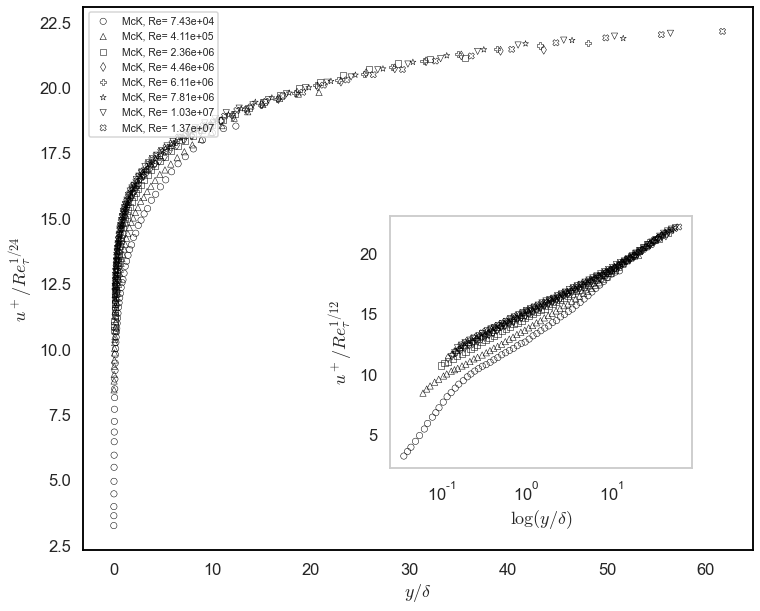

In [16]:
Rem=0
ReM=18

selection = [0, 4, 10, 12, 13, 14, 15, 16]

fig, ax1 = plt.subplots(figsize=(12, 10))

left, bottom, width, height = [0.48, 0.24, 0.35, 0.35] 
ax2 = fig.add_axes([left, bottom, width, height])

colors = matplotlib.cm.tab10(np.linspace(0, 1, len(selection)))
markers=['o','^','s','d','P','*','v','X','<']

line_width = 0.5

j=0
for i in selection:
    ax1.scatter(y__[i][:-1] , u__[i][:-1] , s=40 , linewidth = line_width , facecolors='none', color = 'k', marker = markers[j%len(markers)], label = author[i]+', Re= '+'{:.2e}'.format(re__[i]))
    j+=1

j=0
for i in selection:
    ax2.scatter(y__[i][:-1] , u__[i][:-1] , s=40 , linewidth = line_width, facecolors = 'none', color='k' , marker = markers[j%len(markers)], label = author[i]+', Re= '+'{:.2e}'.format(re__[i]))
    j+=1

    
ax1.legend(loc = 'upper left', fontsize = 'xx-small')
ax1.set_xlabel(r"$y/\delta$")
ax1.set_ylabel(r'$u^+/Re_\tau^{1/24}$')
#ax1.set_ylim([2,15])
ax1.grid(False)
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
ax2.set_xlabel(r"$\log(y/\delta)$")
ax2.set_ylabel(r'$u^+/Re_\tau^{1/12}$')
ax2.set_xscale('log')
#ax2.set_xlim([0.01,1])
ax2.grid(False)
plt.savefig('SB_Vallikivi&Mckeon_Scatter_Extreme_Corrected_ExtremeRange.pdf', format='pdf', dpi=1200)
plt.show()

## Fit the data to the $10^7$

In [17]:
ig_low=2.6; ig_high=0.9

u_= np.array(dfSB10M_M['U+'])
y_= np.array(dfSB10M_M['y+'])

slice_ = (y_>=(ig_low*re_tau[-3]**0.5))&(y_<=(ig_high*re_tau[-3]))
y_ = y__[-3][slice_]
u_ = u__[-3][slice_]

C_gabriel, D_gabriel = np.linalg.lstsq(make_gabriel_matrix_extreme(y_),u_,rcond=None)[0]
print(C_gabriel,D_gabriel)

13.901085820156313 1.3050447216700556


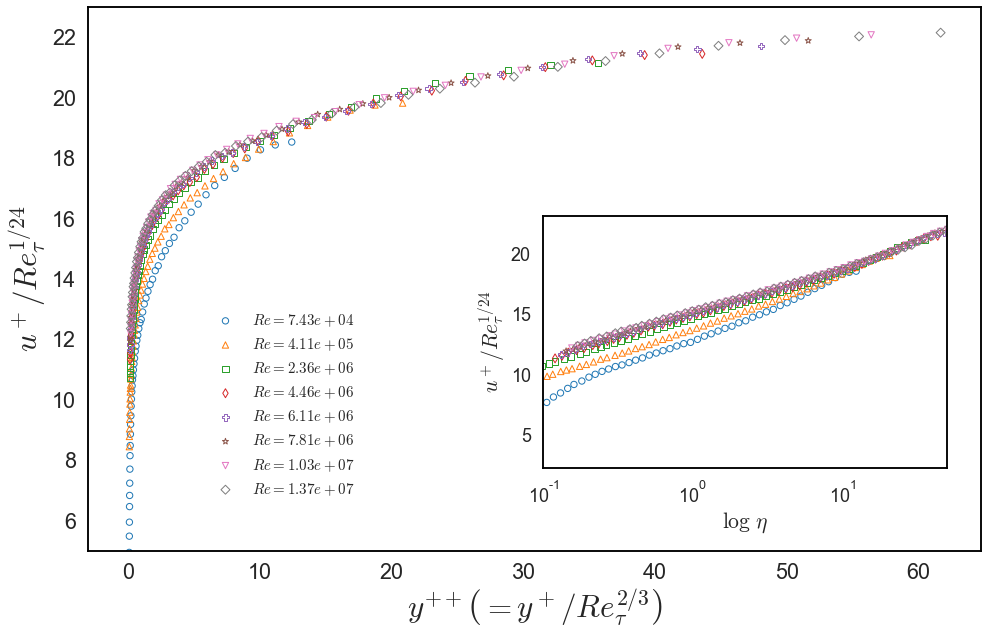

In [18]:
y_1=np.linspace(0,60,num=10000)
u_gabriel = func_g_extreme(y_1,C_gabriel,D_gabriel)

fig, ax1 = plt.subplots(figsize=(16, 10))

selection = [0, 4, 10, 12, 13, 14, 15, 16]

left, bottom, width, height = [0.52, 0.24, 0.35, 0.35] 
ax2 = fig.add_axes([left, bottom, width, height])

colors = matplotlib.cm.tab10(np.linspace(0, 1, 10))
markers=['o','^','s','d','P','*','v','D']

line_width = 1

j=0
for i in selection:
    if i==25:
        ax1.scatter(y__[i][:-1] , u__[i][:-1] , alpha = 1, s=40 ,linewidth = line_width, facecolors = 'none' , color = colors[7] , marker = 'D', label = r'$Re= $'+r'${:.2e}$'.format(re__[i]))
    elif i==26:
        ax1.scatter(y__[i][:-1] , u__[i][:-1] , alpha = 1, s=40 ,linewidth = line_width, facecolors = 'none' , color = colors[8] , marker = 'h', label = r'$Re= $'+r'${:.2e}$'.format(re__[i]))
    else:
        ax1.scatter(y__[i][:-1] , u__[i][:-1] , alpha = 1, s=40 ,linewidth = line_width, facecolors = 'none' , color = colors[j] , marker = markers[j%len(markers)], label = r'$Re= $'+r'${:.2e}$'.format(re__[i]))
        j+=1

j=0
for i in selection:
    ax2.scatter(y__[i][:-1] , u__[i][:-1] , alpha = 1, s=40 , linewidth = line_width, facecolors = 'none', color = colors[j] , marker = markers[j%len(markers)], label = author[i]+', \mathbf{Re=}'+'{:.2e}'.format(re__[i]))
    j+=1

#ax1.plot(y_1, u_gabriel, 'k--', alpha = 0.5, label = r"$\Phi_E^{(1)}$ - Multiscaling Best Fit")
#ax2.plot(y_1, u_gabriel, 'k--', alpha = 0.5, label = 'Best Fit')

font = font_manager.FontProperties(family='DejaVu Sans',
                                   weight='roman',
                                   style='normal', size = 'small', stretch = 'ultra-condensed')

ax1.legend(bbox_to_anchor=(0.13, 0.45), loc = 'upper left', edgecolor = 'white', framealpha = 0, prop = font, borderaxespad=0.)
ax1.set_xlabel(r"$  y^{++} \left( = y^+/Re_\tau^{2/3}\right)$", size = 'xx-large', fontweight = 'black')
ax1.set_ylabel(r'$u^+/Re_\tau^{1/24}$', size = 'xx-large')
ax1.set_ylim([5,23])
ax1.grid(False)
ax1.tick_params(axis='x', labelsize = 'large')
ax1.tick_params(axis='y', labelsize = 'large')
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
ax2.spines['bottom'].set_color('black')
ax2.spines['top'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.spines['right'].set_color('black')
ax2.set_xlabel(r"$\log \ \eta $", fontsize = 'large')
ax2.set_ylabel(r'$u^+/Re_\tau^{1/24}$', fontsize = 'large')
ax2.set_xscale('log')
ax2.tick_params(axis='x', labelsize = 'medium')
ax2.tick_params(axis='y', labelsize = 'medium')
ax2.set_xlim([0.1,50])
#ax2.set_ylim([5,14])
ax2.grid(False)
plt.savefig('SB_McKeon_Fit.pdf', format='pdf', dpi=1200)
plt.show()

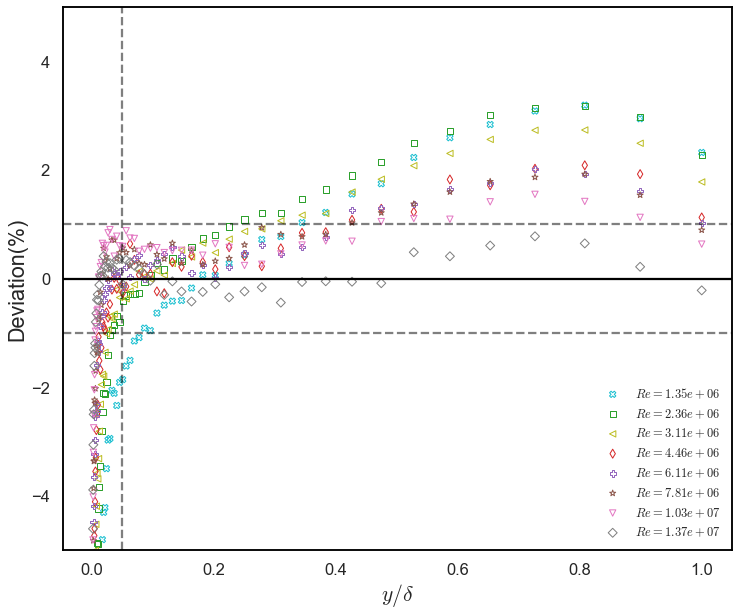

In [13]:
i=0
rel_error=[]
for i in range(Rem,ReM+1):
    error=(u__[i]-func_g_extreme(y__[i],C_gabriel,D_gabriel))/u__[i]
    error = error*100
    rel_error.append(error)
    i+=1

selection = [13,16,17,19,21,22,24,25]

fig, ax1 = plt.subplots(figsize=(12, 10))
markers=['o','^','v','X','s','d','P','*','<','D']
colors = matplotlib.cm.tab10(np.linspace(0, 1, 10))

markers_old=['s','d','P','*','v','X','<']
markers_new=['X','<','D']

line_width = 1

j=2
m1=0
m2=0
k=0
for i in selection:
    if i==13 or i==17 or i==25:
        ax1.scatter(y__[i][:-1] , rel_error[i][:-1] , alpha=1, s=40 , linewidth = line_width, facecolors='none', color=colors[9-k] , marker = markers_new[m2], label = r'$ Re=$'+r'${:.2e}$'.format(re__[i]))
        m2+=1
        k+=1
    else:
        ax1.scatter(y__[i][:-1] , rel_error[i][:-1] , alpha=1, s=40 , linewidth = line_width, facecolors='none', color=colors[j] , marker = markers_old[m1], label = r'$ Re=$'+r'${:.2e}$'.format(re__[i]))
        j+=1
        m1+=1
    
ax1.legend(loc = 'lower right', fontsize = 'x-small', edgecolor = 'white', framealpha = 0)
ax1.set_xlabel(r"$y/\delta$", fontsize = 'large')
ax1.set_ylabel(r"Deviation(%)", fontsize = 'large')
ax1.set_ylim(bottom=-5,top=5)
ax1.axvline((0.05),color='black',linestyle='--', alpha = 0.5)
ax1.axhline((0.0),color='black',linestyle='-')
ax1.axhline((1.0),color='black',linestyle='--', alpha=0.5)
ax1.axhline((-1.0),color='black',linestyle='--', alpha=0.5)
ax1.grid(False)
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
plt.savefig('SB_Mckeon_RelError.pdf', format='pdf', dpi=1200)
plt.show()

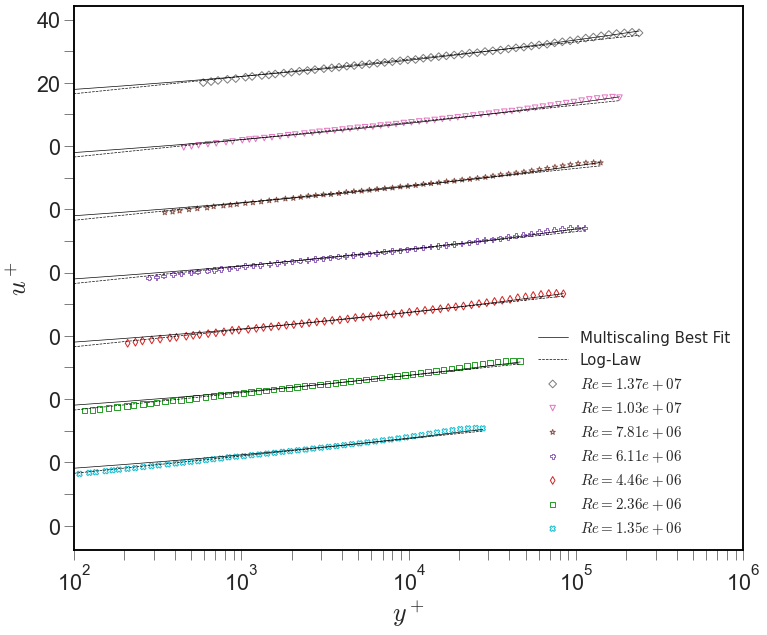

In [14]:
selection = [25,24,22,21,19,16,13]
k=0.421
B=5.6

fig, ax1 = plt.subplots(figsize=(12, 10))

colors = matplotlib.cm.tab10(np.linspace(0, 1, 10))
markers=['D','v','*','P','d','s']

line_width = 1

j=0
shift=120
for i in selection:
    if i ==13:
        j=-3
        ax1.scatter(yplus_[i] , uplus_[i]+shift , alpha = 1, s=30 , linewidth = line_width , facecolors='none', color = colors[6-j], marker = 'X', label = r'$Re=$'+r'${:.2e}$'.format(re__[i]))
    else:
        ax1.scatter(yplus_[i] , uplus_[i]+shift , alpha = 1, s=30 , linewidth = line_width , facecolors='none', color = colors[7-j], marker = markers[j], label = r'$Re=$'+r'${:.2e}$'.format(re__[i]))
    y_1=np.linspace(0.1,max(yplus_[i]),num=1000000)
    u_gabriel = func_plus_variables_extreme(y_1,C_gabriel,D_gabriel,re_tau[i]) + shift
    loglaw = (1/k)*np.log(y_1) + B + shift
    if shift == 0:
        ax1.plot(y_1, u_gabriel, color='black', ls= 'solid', linewidth = 0.7, alpha=10, label = 'Multiscaling Best Fit')
        ax1.plot(y_1, loglaw, color = 'black', ls= 'dashed', linewidth = 0.7, alpha=10, label = 'Log-Law')
    else:
        ax1.plot(y_1, u_gabriel, color='black', ls= 'solid', linewidth = 0.7, alpha=10)
        ax1.plot(y_1, loglaw, color = 'black', ls= 'dashed', linewidth = 0.7, alpha=10)
    j+=1
    shift-=20

font = font_manager.FontProperties(family='DejaVu Sans',
                                   weight='roman',
                                   style='normal', size = 'small', stretch = 'ultra-condensed')
    
ax1.legend(loc = 'lower right', edgecolor = 'white', framealpha = 0, prop = font)
ax1.set_xlabel(r"$y^+$", fontsize = 'x-large')
ax1.set_ylabel(r'$u^+$', fontsize = 'x-large')
ax1.set_xscale('log')
ax1.set_xlim([100,1000000])
ax1.grid(False)
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.set_yticks(ticks = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160])
ax1.set_yticklabels(labels = [0,' ',0,'',0,'',0,'',0,'',0, '', 0, '', 20,'',40])
ax1.tick_params(length = 10, width=0.5, color='black', direction = 'out', axis='both', which = 'both', bottom = True, left = True)
ax1.tick_params(axis='x', labelsize = 'large')
ax1.tick_params(axis='y', labelsize = 'large')
plt.savefig('SB_McKeon_PlusVariables.pdf', format='pdf', dpi=1200)
plt.show()

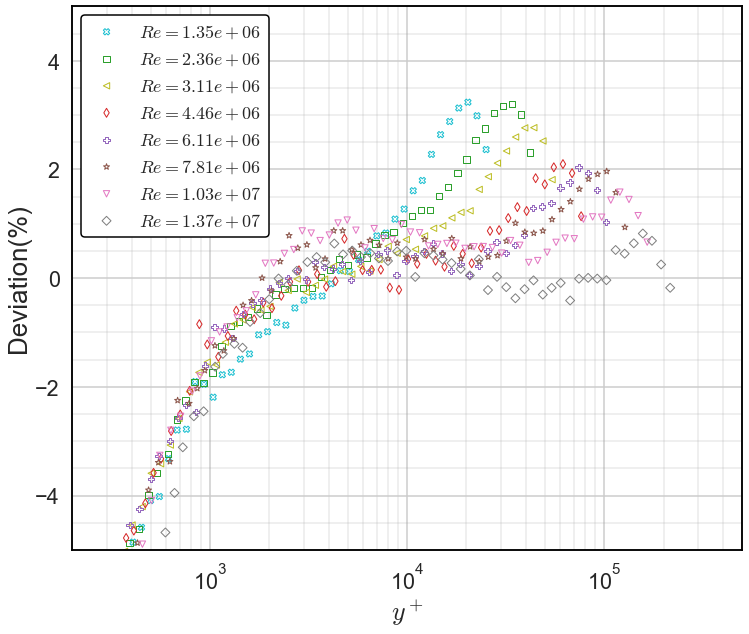

In [15]:
i=0
rel_error=[]
for i in range(Rem,ReM+1):
    error=(uplus_[i]-func_plus_variables_extreme(yplus_[i], C_gabriel, D_gabriel, re_tau[i]))/uplus_[i]
    error = error*100
    rel_error.append(error)
    i+=1

selection = [13,16,17,19,21,22,24,25]

fig, ax1 = plt.subplots(figsize=(12, 10))
markers=['o','^','v','X','s','d','P','*','<','D']
colors = matplotlib.cm.tab10(np.linspace(0, 1, 10))

markers_old=['s','d','P','*','v','X','<']
markers_new=['X','<','D']

line_width = 1

j=2
m1=0
m2=0
k=0
for i in selection:
    if i==13 or i==17 or i==25:
        ax1.scatter(yplus_[i][:-1] , rel_error[i][:-1] , alpha=1, s=40 , linewidth = line_width, facecolors='none', color=colors[9-k] , marker = markers_new[m2], label = r'$Re=$'+r'${:.2e}$'.format(re__[i]))
        m2+=1
        k+=1
    else:
        ax1.scatter(yplus_[i][:-1] , rel_error[i][:-1] , alpha=1, s=40 , linewidth = line_width, facecolors='none', color=colors[j] , marker = markers_old[m1], label = r'$Re=$'+r'${:.2e}$'.format(re__[i]))
        j+=1
        m1+=1
    
ax1.legend(loc = 'upper left', fontsize = 'medium', edgecolor = 'black', framealpha = 1)
ax1.set_xlabel(r"$y^+$", fontsize = 'x-large')
ax1.set_ylabel(r"Deviation(%)", fontsize = 'x-large')
ax1.set_xlim(left=200,right=500000)
ax1.set_ylim(bottom=-5,top=5)
ax1.set_xscale('log')
# ax1.axhline((0.0),color='black',linestyle='-')
ax1.minorticks_on()
ax1.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.tick_params(axis='x', labelsize = 'large')
ax1.tick_params(axis='y', labelsize = 'large')
plt.savefig('SB_Mckeon_RelError_plusvariables.pdf', format='pdf', dpi=1200)
plt.show()

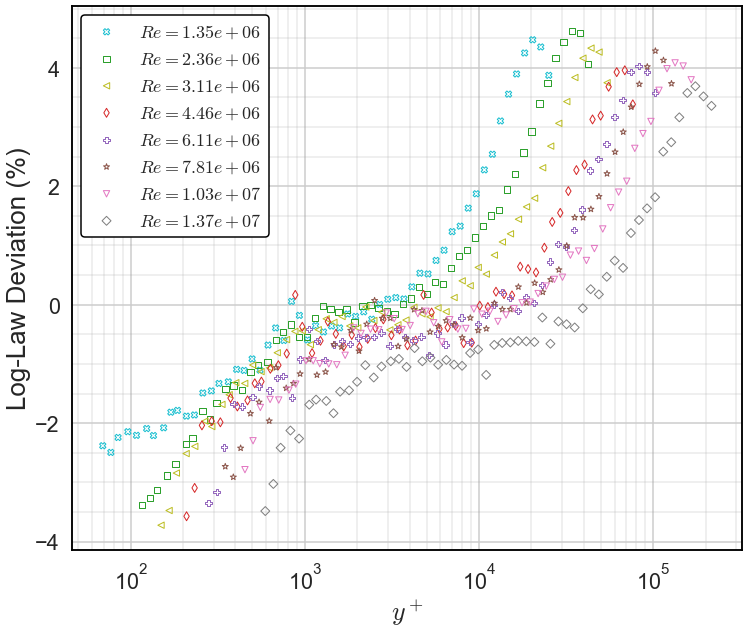

In [16]:
K=0.421
B=5.6

i=0
rel_error=[]
for i in range(Rem,ReM+1):
    error=(uplus_[i]-log_law(yplus_[i], K, B))/uplus_[i]
    error = error*100
    rel_error.append(error)
    i+=1

selection = [13,16,17,19,21,22,24,25]

fig, ax1 = plt.subplots(figsize=(12, 10))
markers=['o','^','v','X','s','d','P','*','<','D']
colors = matplotlib.cm.tab10(np.linspace(0, 1, 10))

markers_old=['s','d','P','*','v','X','<']
markers_new=['X','<','D']

line_width = 1

j=2
m1=0
m2=0
k=0
for i in selection:
    if i==13 or i==17 or i==25:
        ax1.scatter(yplus_[i][:-1] , rel_error[i][:-1] , alpha=1, s=40 , linewidth = line_width, facecolors='none', color=colors[9-k] , marker = markers_new[m2], label = r'$Re=$'+r'${:.2e}$'.format(re__[i]))
        m2+=1
        k+=1
    else:
        ax1.scatter(yplus_[i][:-1] , rel_error[i][:-1] , alpha=1, s=40 , linewidth = line_width, facecolors='none', color=colors[j] , marker = markers_old[m1], label = r'$Re=$'+r'${:.2e}$'.format(re__[i]))
        j+=1
        m1+=1
    
ax1.legend(loc = 'upper left', fontsize = 'medium', edgecolor = 'black', framealpha = 1)
ax1.set_xlabel(r"$y^+$", fontsize = 'x-large')
ax1.set_ylabel("Log-Law Deviation (%)", fontsize = 'x-large')
ax1.set_xscale('log')
#ax1.axhline((0.0),color='black',linestyle='-')
ax1.minorticks_on()
ax1.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.tick_params(axis='x', labelsize = 'large')
ax1.tick_params(axis='y', labelsize = 'large')
plt.savefig('SB_Mckeon_RelError_loglaw.pdf', format='pdf', dpi=1200)
plt.show()

In [17]:
print(C_gabriel, D_gabriel)
len(y__)

11.373037433805434 1.5793790677726767


28

In [18]:
ig_low=2.6; ig_high=1

u_= np.array(dfSB10M_M['U+'])
y_= np.array(dfSB10M_M['y+'])

slice_ = (y_>=(ig_low*re_tau[-3]**0.5))&(y_<=(ig_high*re_tau[-3]))
y_ = y__[-3][slice_]
u_ = u_bar[-3][slice_]

C_bar, D_bar = np.linalg.lstsq(make_gabriel_matrix_extreme(y_),u_,rcond=None)[0]
print(C_bar, D_bar)

1.0051348455038929 0.13958354964691264


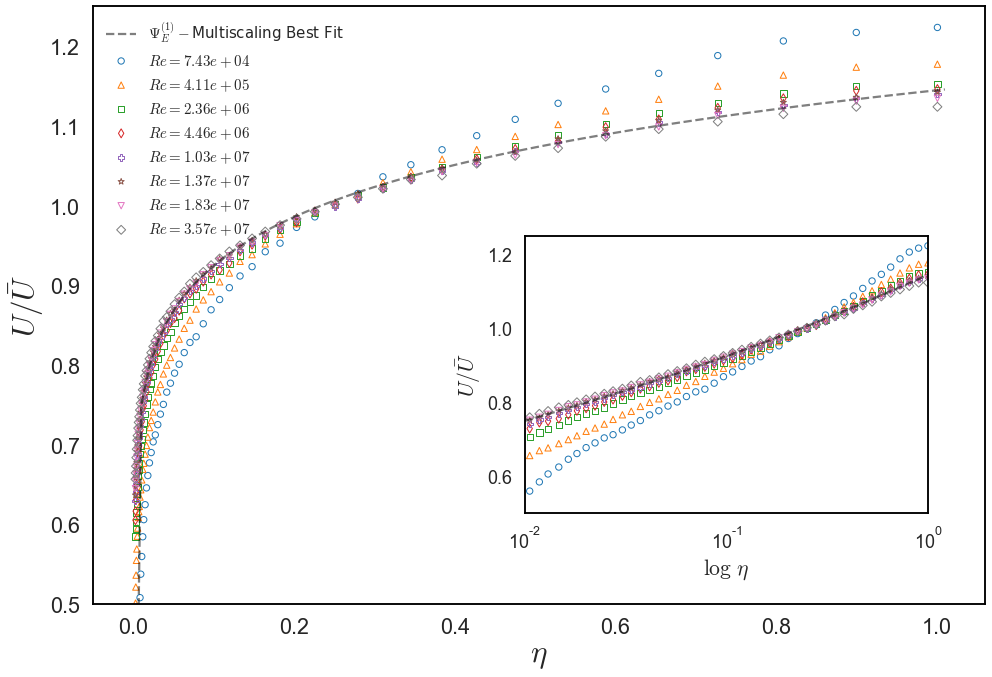

In [24]:
y_1=np.linspace(0,1.01,num=100)
u_gabriel = func_g_extreme(y_1,C_bar,D_bar)

selection = [0,7,16,19,24,25,26,27]

fig, ax1 = plt.subplots(figsize=(16, 11))

left, bottom, width, height = [0.5, 0.24, 0.35, 0.35] 
ax2 = fig.add_axes([left, bottom, width, height])

colors = matplotlib.cm.tab10(np.linspace(0, 1, 10))
markers=['o','^','s','d','P','*','v','D','h']

line_width = 1

j=0
for i in selection:
    ax1.scatter(y__[i][:-1] , u_bar[i][:-1], alpha = 1, s=40 , linewidth = line_width , facecolors='none', color = colors[j], marker = markers[j], label = r'$Re=$'+r'${:.2e}$'.format(re__[i]))
    j+=1

j=0
for i in selection:
    ax2.scatter(y__[i][:-1] , u_bar[i][:-1], alpha = 1, s=40 , linewidth = line_width, facecolors = 'none', color = colors[j] , marker = markers[j], label = ', Re= '+'{:.2e}'.format(re__[i]))
    j+=1
    
ax1.plot(y_1, u_gabriel, 'k--', alpha = 0.5, label = r"$\Psi_E^{(1)} - $Multiscaling Best Fit")
ax2.plot(y_1, u_gabriel, 'k--', alpha = 0.5, label = 'Best Fit')

font = font_manager.FontProperties(family='DejaVu Sans',
                                   weight='roman',
                                   style='normal', size = 'small', stretch = 'ultra-condensed')

ax1.legend(loc = 'upper left', edgecolor = 'white', framealpha = 0, prop = font)
ax1.set_xlabel(r"$\eta$", fontsize = 'xx-large')
ax1.set_ylabel(r'$U/\bar{U}$', fontsize = 'xx-large')
ax1.set_ylim([0.5,1.25])
ax1.grid(False)
ax1.tick_params(axis='x', labelsize = 'large')
ax1.tick_params(axis='y', labelsize = 'large')
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
ax2.spines['bottom'].set_color('black')
ax2.spines['top'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.spines['right'].set_color('black')
ax2.set_xlabel(r"$\log \ \eta$", fontsize = 'large')
ax2.set_ylabel(r'$U/\bar{U}$', fontsize = 'large')
ax2.set_xscale('log')
ax2.set_xlim([0.01,1])
ax2.set_ylim([0.5,1.25])
ax2.grid(False)
ax2.tick_params(axis='x', labelsize = 'medium')
ax2.tick_params(axis='y', labelsize = 'medium')
plt.savefig('SB_McKeon_ubar_high reynolds.pdf', format='pdf', dpi=1200)
plt.show()

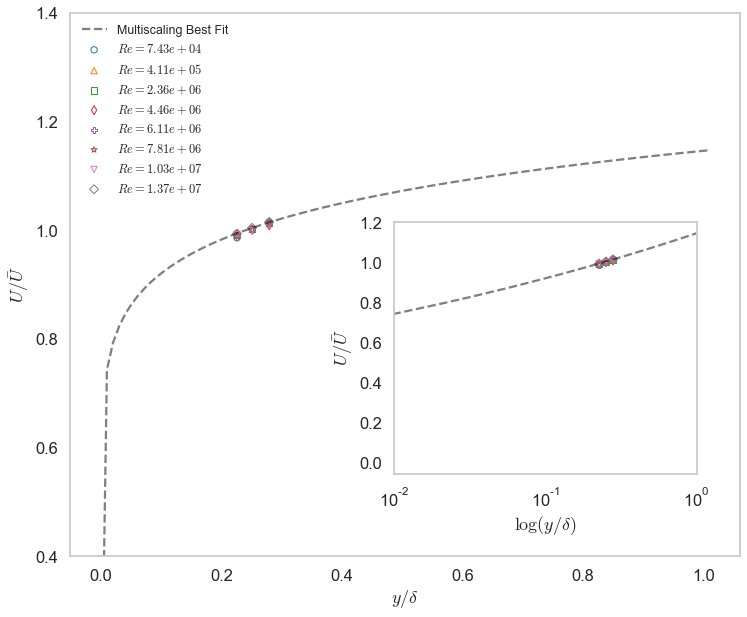

In [114]:
 N=43

y_1=np.linspace(0,1.01,num=100)
u_gabriel = func_g_extreme(y_1,C_bar,D_bar)

selection = [0,7,16,19,21,22,24,25]

fig, ax1 = plt.subplots(figsize=(12, 10))

left, bottom, width, height = [0.5, 0.24, 0.35, 0.35] 
ax2 = fig.add_axes([left, bottom, width, height])

colors = matplotlib.cm.tab10(np.linspace(0, 1, 10))
markers=['o','^','s','d','P','*','v','D','h']

line_width = 1

j=0
for i in selection:
    ax1.scatter(y__[i][N-2:N+1] , u_bar[i][N-2:N+1], alpha = 1, s=40 , linewidth = line_width , facecolors='none', color = colors[j], marker = markers[j], label = r'$Re=$'+r'${:.2e}$'.format(re__[i]))
    j+=1

j=0
for i in selection:
    ax2.scatter(y__[i][N-2:N+1] , u_bar[i][N-2:N+1], alpha = 1, s=40 , linewidth = line_width, facecolors = 'none', color = colors[j] , marker = markers[j], label = ', Re= '+'{:.2e}'.format(re__[i]))
    j+=1
    
ax1.plot(y_1, u_gabriel, 'k--', alpha = 0.5, label = "Multiscaling Best Fit")
ax2.plot(y_1, u_gabriel, 'k--', alpha = 0.5, label = 'Best Fit')

ax1.legend(loc = 'upper left', fontsize = 'x-small', edgecolor = 'white', framealpha = 0)
ax1.set_xlabel(r"$y/\delta$")
ax1.set_ylabel(r'$U/\bar{U}$')
ax1.set_ylim([0.4,1.4])
ax1.grid(False)
ax2.set_xlabel(r"$\log(y/\delta)$")
ax2.set_ylabel(r'$U/\bar{U}$')
ax2.set_xscale('log')
ax2.set_xlim([0.01,1])
ax2.grid(False)
plt.savefig('SB_McKeon_ubar_test.pdf', format='pdf', dpi=1200)
plt.show()

In [115]:
print(y__[i][N] , u_bar[i][N])

0.27945 1.01505134222879


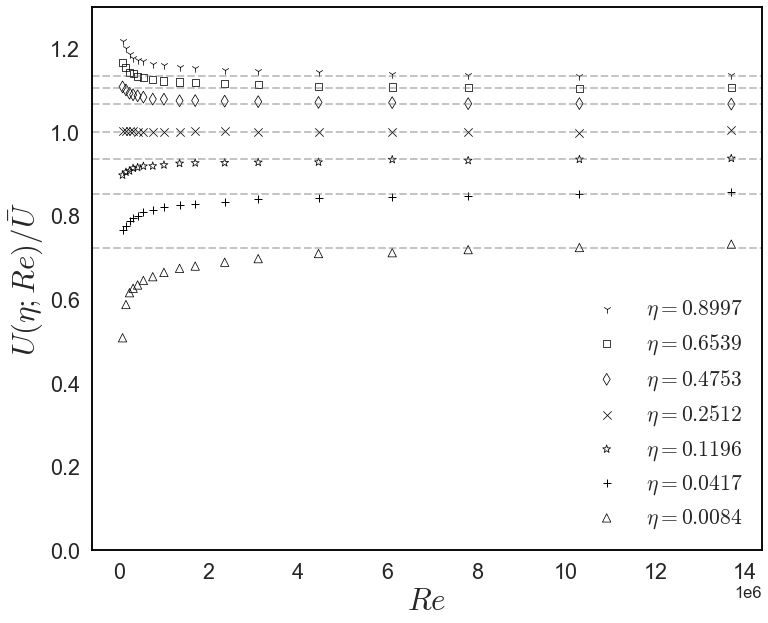

In [118]:
N=42
lower1 =10
lower2 = 25
lower3 = 35
upper1 = 48
upper2 = 51
upper3 = 54
selection = [0,7,16,19,21,22,24,25]
fig, ax1 = plt.subplots(figsize=(12, 10))
markers=['o','^','s','d','P','*','v','D','h']

selection=[]
line_width = 0.75

for j in range(ReM+1):
    if author[j] == "McK":
        selection.append(j)

for i in selection:
    ax1.axhline((u_bar[24][lower1]),color='grey', alpha = 3e-2, linestyle='--', linewidth = 2)
    ax1.axhline((u_bar[24][lower2]),color='grey', alpha = 3e-2, linestyle='--', linewidth = 2)
    ax1.axhline((u_bar[24][lower3]),color='grey', alpha = 3e-2, linestyle='--', linewidth = 2)
    ax1.axhline((u_bar[24][upper1]),color='grey', alpha = 3e-2, linestyle='--', linewidth = 2)
    ax1.axhline((u_bar[24][upper2]),color='grey', alpha = 3e-2, linestyle='--', linewidth = 2)
    ax1.axhline((u_bar[24][upper3]),color='grey', alpha = 3e-2, linestyle='--', linewidth = 2)
    ax1.axhline((1.0), color='grey', alpha= 3e-2, linestyle='--', linewidth = 2)
    if i==0:
        ax1.scatter(re__[i], u_bar[i][upper3], alpha = 1, s=70 , linewidth = line_width, color = 'black', marker = '1', label = r'$\eta = $'+r'${:.4f}$'.format(y__[i][upper3]))
        ax1.scatter(re__[i], u_bar[i][upper2], alpha = 1, s=50, linewidth = line_width, facecolors = 'none', color = 'black', marker = 's', label = r'$\eta = $'+r'${:.4f}$'.format(y__[i][upper2]))
        ax1.scatter(re__[i], u_bar[i][upper1], alpha = 1, s=70 , linewidth = line_width , facecolors='none', color = 'black', marker = markers[3], label = r'$\eta = $'+r'${:.4f}$'.format(y__[i][upper1]))
        ax1.scatter(re__[i], u_bar[i][N], alpha = 1, s=70 , linewidth = line_width , color = 'black', marker = 'x', label = r'$\eta = $'+r'${:.4f}$'.format(y__[i][N]))
        ax1.scatter(re__[i], u_bar[i][lower3], alpha = 1, s=70 , linewidth = line_width , facecolor = 'none', color = 'black', marker = '*', label = r'$\eta = $'+r'${:.4f}$'.format(y__[i][lower3]))
        ax1.scatter(re__[i], u_bar[i][lower2], alpha = 1, s=70 , linewidth = 1 , color = 'black', marker = '+', label = r'$\eta = $'+r'${:.4f}$'.format(y__[i][lower2]))
        ax1.scatter(re__[i], u_bar[i][lower1], alpha = 1, s=70 , linewidth = line_width , facecolors='none', color = 'black', marker = markers[1], label = r'$\eta = $'+r'${:.4f}$'.format(y__[i][lower1]))
    else:
        ax1.scatter(re__[i], u_bar[i][N], alpha = 1, s=70 , linewidth = line_width , color = 'black', marker = 'x')
        ax1.scatter(re__[i], u_bar[i][lower1], alpha = 1, s=70 , linewidth = line_width , facecolors='none', color = 'black', marker = markers[1])
        ax1.scatter(re__[i], u_bar[i][lower2], alpha = 1, s=70 , linewidth = 1 , color = 'black', marker = '+')
        ax1.scatter(re__[i], u_bar[i][lower3], alpha = 1, s=70 , linewidth = line_width, facecolors = 'none', color = 'black', marker = '*')
        ax1.scatter(re__[i], u_bar[i][upper1], alpha = 1, s=70 , linewidth = line_width , facecolors='none', color = 'black', marker = markers[3])
        ax1.scatter(re__[i], u_bar[i][upper2], alpha = 1, s=50 , linewidth = line_width, facecolor = 'none', color = 'black', marker = 's')
        ax1.scatter(re__[i], u_bar[i][upper3], alpha = 1, s=70 , linewidth = line_width, color = 'black', marker = '1')

ax1.set_ylim([0,1.3])
ax1.ticklabel_format(axis='x',style='sci',scilimits=(6,6))
ax1.grid(False)
ax1.legend(loc = 'lower right', fontsize = 'large', edgecolor = 'white', framealpha = 0)
ax1.set_xlabel(r"$Re$", fontsize = 'xx-large')
ax1.set_ylabel(r'$U(\eta;Re)/\bar{U}$', fontsize = 'xx-large')
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.tick_params(axis='x', labelsize = 'large')
ax1.tick_params(axis='y', labelsize = 'large')
plt.savefig('SB_McKeon_025.pdf', format='pdf', dpi=1200)
plt.show()

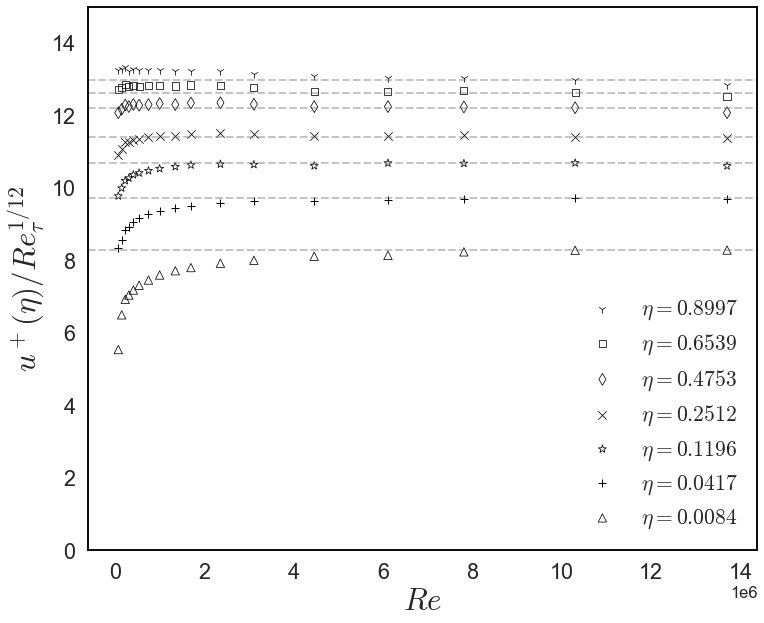

In [119]:
N=42
lower1 =10
lower2 = 25
lower3 = 35
upper1 = 48
upper2 = 51
upper3 = 54
selection = [0,7,16,19,21,22,24,25]
fig, ax1 = plt.subplots(figsize=(12, 10))
markers=['o','^','s','d','P','*','v','D','h']

selection=[]
line_width = 0.75

for j in range(ReM+1):
    if author[j] == "McK":
        selection.append(j)

for i in selection:
    ax1.axhline((u__[24][lower1]),color='grey', alpha = 3e-2, linestyle='--', linewidth = 2)
    ax1.axhline((u__[24][lower2]),color='grey', alpha = 3e-2, linestyle='--', linewidth = 2)
    ax1.axhline((u__[24][lower3]),color='grey', alpha = 3e-2, linestyle='--', linewidth = 2)
    ax1.axhline((u__[24][upper1]),color='grey', alpha = 3e-2, linestyle='--', linewidth = 2)
    ax1.axhline((u__[24][upper2]),color='grey', alpha = 3e-2, linestyle='--', linewidth = 2)
    ax1.axhline((u__[24][upper3]),color='grey', alpha = 3e-2, linestyle='--', linewidth = 2)
    ax1.axhline((u__[24][N]), color='grey', alpha= 3e-2, linestyle='--', linewidth = 2)
    if i==0:
        ax1.scatter(re__[i], u__[i][upper3], alpha = 1, s=70 , linewidth = line_width, color = 'black', marker = '1', label = r'$\eta = $'+r'${:.4f}$'.format(y__[i][upper3]))
        ax1.scatter(re__[i], u__[i][upper2], alpha = 1, s=50 , linewidth = line_width, facecolors = 'none', color = 'black', marker = 's', label = r'$\eta = $'+r'${:.4f}$'.format(y__[i][upper2]))
        ax1.scatter(re__[i], u__[i][upper1], alpha = 1, s=70 , linewidth = line_width , facecolors='none', color = 'black', marker = markers[3], label = r'$\eta = $'+r'${:.4f}$'.format(y__[i][upper1]))
        ax1.scatter(re__[i], u__[i][N], alpha = 1, s=70 , linewidth = line_width , color = 'black', marker = 'x', label = r'$\eta = $'+r'${:.4f}$'.format(y__[i][N]))
        ax1.scatter(re__[i], u__[i][lower3], alpha = 1, s=70 , linewidth = line_width , facecolor = 'none', color = 'black', marker = '*', label = r'$\eta = $'+r'${:.4f}$'.format(y__[i][lower3]))
        ax1.scatter(re__[i], u__[i][lower2], alpha = 1, s=70 , linewidth = 1 , color = 'black', marker = '+', label = r'$\eta = $'+r'${:.4f}$'.format(y__[i][lower2]))
        ax1.scatter(re__[i], u__[i][lower1], alpha = 1, s=70 , linewidth = line_width , facecolors='none', color = 'black', marker = markers[1], label = r'$\eta = $'+r'${:.4f}$'.format(y__[i][lower1]))
    else:
        ax1.scatter(re__[i], u__[i][N], alpha = 1, s=70 , linewidth = line_width , color = 'black', marker = 'x')
        ax1.scatter(re__[i], u__[i][lower1], alpha = 1, s=70 , linewidth = line_width , facecolors='none', color = 'black', marker = markers[1])
        ax1.scatter(re__[i], u__[i][lower2], alpha = 1, s=70 , linewidth = 1 , color = 'black', marker = '+')
        ax1.scatter(re__[i], u__[i][lower3], alpha = 1, s=70 , linewidth = line_width, facecolors = 'none', color = 'black', marker = '*')
        ax1.scatter(re__[i], u__[i][upper1], alpha = 1, s=70 , linewidth = line_width , facecolors='none', color = 'black', marker = markers[3])
        ax1.scatter(re__[i], u__[i][upper2], alpha = 1, s=50 , linewidth = line_width, facecolor = 'none', color = 'black', marker = 's')
        ax1.scatter(re__[i], u__[i][upper3], alpha = 1, s=70 , linewidth = line_width, color = 'black', marker = '1')

ax1.set_ylim([0,15])
ax1.grid(False)
ax1.ticklabel_format(axis='x',style='sci',scilimits=(6,6))
ax1.legend(loc = 'lower right', fontsize = 'large', edgecolor = 'white', framealpha = 0)
ax1.set_xlabel(r"$Re$", fontsize = 'xx-large')
ax1.set_ylabel(r'$u^+(\eta)/Re_\tau^{1/12}$', fontsize = 'xx-large')
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.tick_params(axis='x', labelsize = 'large')
ax1.tick_params(axis='y', labelsize = 'large')
plt.savefig('SB_McKeon_asymptotic_inner.pdf', format='pdf', dpi=1200)
plt.show()

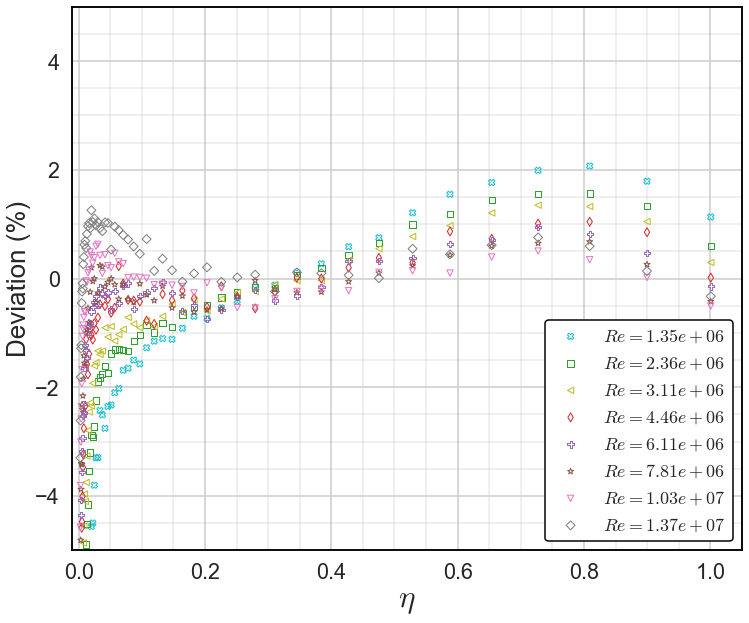

In [147]:
selection = [13,16,17,19,21,22,24,25]

rel_error=[]
for i in range(Rem,ReM+1):
    if i in selection:
        error=(u_bar[i]-func_g_extreme(y__[i], C_bar, D_bar))/u_bar[i]
        error = error*100
        rel_error.append(error)
    else:
        rel_error.append(0)
    i+=1

fig, ax1 = plt.subplots(figsize=(12, 10))
markers=['o','^','v','X','s','d','P','*','<','D']
colors = matplotlib.cm.tab10(np.linspace(0, 1, 10))

markers_old=['s','d','P','*','v','X','<']
markers_new=['X','<','D']

line_width = 1

j=2
m1=0
m2=0
k=0
for i in selection:
    if i==13 or i==17 or i==25:
        ax1.scatter(y__[i][:-1] , rel_error[i][:-1] , alpha=1, s=40 , linewidth = line_width, facecolors='none', color=colors[9-k] , marker = markers_new[m2], label = r'$Re=$'+r'${:.2e}$'.format(re__[i]))
        m2+=1
        k+=1
    elif i == 24:
        ax1.scatter(y__[i][:-1] , rel_error[i][:-1] , alpha=1, s=40 , linewidth = line_width, facecolors='none', color=colors[j] , marker = markers_old[m1], label = r'$Re=$'+r'${:.2e}$'.format(re__[i]))
        j+=1
        m1+=1
    else:
        ax1.scatter(y__[i][:-1] , rel_error[i][:-1] , alpha=1, s=40 , linewidth = line_width, facecolors='none', color=colors[j] , marker = markers_old[m1], label = r'$Re=$'+r'${:.2e}$'.format(re__[i]))
        j+=1
        m1+=1
    
ax1.legend(loc = 'lower right', fontsize = 'medium', edgecolor = 'black', framealpha = 1)
ax1.set_xlabel(r"$\eta$", fontsize = 'xx-large')
ax1.set_ylabel(r"Deviation (%)", fontsize = 'x-large')
ax1.set_xlim([-0.01,1.05])
ax1.set_ylim([-5,5])
# ax1.axhline((0.0),color='black',linestyle='-')
ax1.minorticks_on()
ax1.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.tick_params(axis='x', labelsize = 'large')
ax1.tick_params(axis='y', labelsize = 'large')
plt.savefig('SB_Mckeon_RelError_ubar.pdf', format='pdf', dpi=1200)
plt.show()

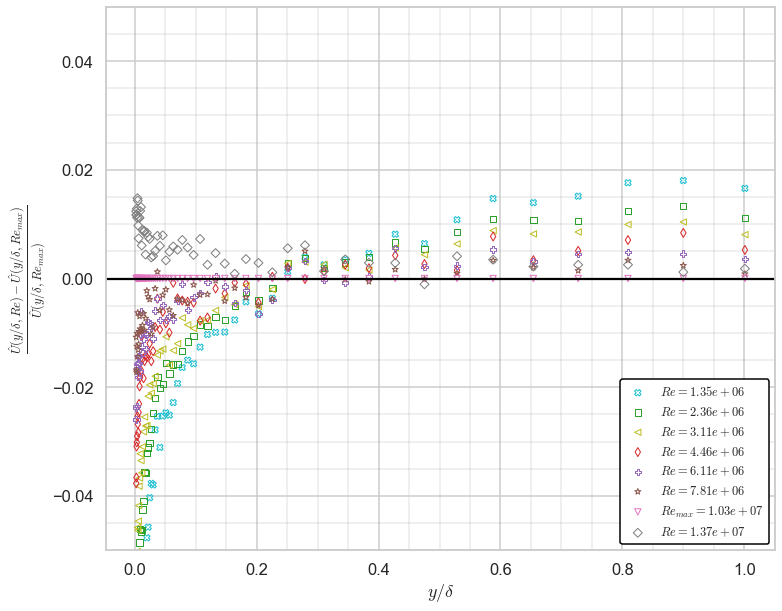

In [126]:
selection = [13,16,17,19,21,22,24,25]

rel_error=[]
for i in range(Rem,ReM+1):
    if i in selection:
        error=(u_bar[i]-u_bar[24])/u_bar[24]
        rel_error.append(error)
    else:
        rel_error.append(0)
    i+=1

selection = [13,16,17,19,21,22,24,25]

fig, ax1 = plt.subplots(figsize=(12, 10))
markers=['o','^','v','X','s','d','P','*','<','D']
colors = matplotlib.cm.tab10(np.linspace(0, 1, 10))

markers_old=['s','d','P','*','v','X','<']
markers_new=['X','<','D']

line_width = 1

j=2
m1=0
m2=0
k=0
for i in selection:
    if i==13 or i==17 or i==25:
        ax1.scatter(y__[i][:-1] , rel_error[i][:-1] , alpha=1, s=40 , linewidth = line_width, facecolors='none', color=colors[9-k] , marker = markers_new[m2], label = r'$ Re=$'+r'${:.2e}$'.format(re__[i]))
        m2+=1
        k+=1
    elif i == 24:
        ax1.scatter(y__[i][:-1] , rel_error[i][:-1] , alpha=1, s=40 , linewidth = line_width, facecolors='none', color=colors[j] , marker = markers_old[m1], label = r'$ Re_{max}=$'+r'${:.2e}$'.format(re__[i]))
        j+=1
        m1+=1
    else:
        ax1.scatter(y__[i][:-1] , rel_error[i][:-1] , alpha=1, s=40 , linewidth = line_width, facecolors='none', color=colors[j] , marker = markers_old[m1], label = r'$ Re=$'+r'${:.2e}$'.format(re__[i]))
        j+=1
        m1+=1
    
ax1.legend(loc = 'lower right', fontsize = 'x-small', edgecolor = 'black', framealpha = 1)
ax1.set_xlabel(r"$y/\delta$")
ax1.set_ylabel(r"$\frac{\hat{U}(y/\delta, Re) - \hat{U}(y/\delta, Re_{max})}{\hat{U}(y/\delta, Re_{max})}$")
ax1.set_ylim([-0.05,0.05])
#ax1.axvline((0.05),color='black',linestyle='--', alpha = 0.5)
ax1.axhline((0.0),color='black',linestyle='-')
ax1.minorticks_on()
ax1.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.savefig('SB_Mckeon_RelError_Remax.pdf', format='pdf', dpi=1200)
plt.show()

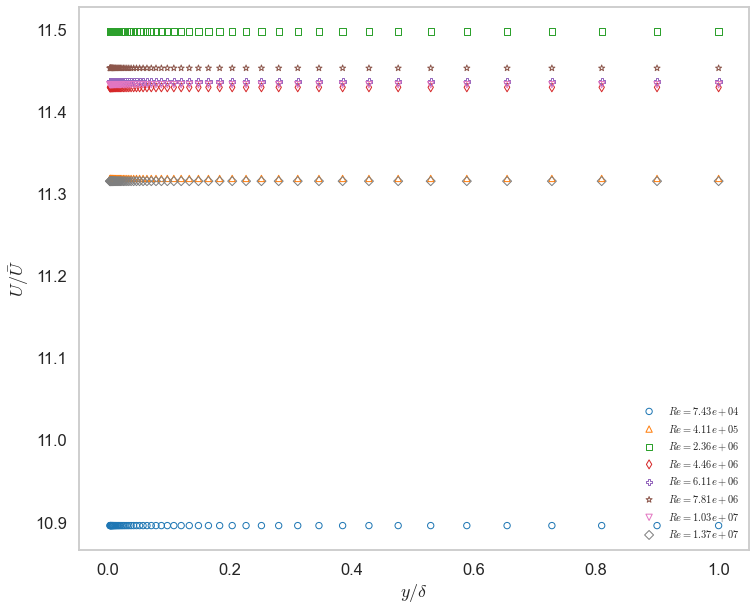

10.895639100481239 74300.0
11.31823341096893 411000.0
11.497227444995328 2360000.0
11.429172043958582 4460000.0
11.436243911691077 6110000.0
11.452532659870474 7810000.0
11.432373752821913 10300000.0
11.314936980524152 13700000.0


In [55]:
y_1=np.linspace(0,1.01,num=100)
u_gabriel = func_g_extreme(y_1,C_bar,D_bar)

selection = [0,7,16,19,21,22,24,25]

fig, ax1 = plt.subplots(figsize=(12, 10))

colors = matplotlib.cm.tab10(np.linspace(0, 1, 10))
markers=['o','^','s','d','P','*','v','D','<']

line_width = 1

j=0
for i in selection:
    ax1.scatter(y__[i][:-1] , u__[i][:-1]/ u_bar[i][:-1], alpha = 1, s=40 , linewidth = line_width , facecolors='none', color = colors[j], marker = markers[j], label = r'$Re=$'+r'${:.2e}$'.format(re__[i]))
    j+=1

ax1.legend(loc = 'lower right', fontsize = 'xx-small', edgecolor = 'white', framealpha = 0)
ax1.set_xlabel(r"$y/\delta$")
ax1.set_ylabel(r'$U/\bar{U}$')
ax1.grid(False)
plt.savefig('SB_McKeon_Ratio.pdf', format='pdf', dpi=1200)
plt.show()

for i in selection:
    print(u__[i][0]/ u_bar[i][0], re__[i])

## Fit viscous-kolmo

In [56]:
ig_low=2.6; ig_high=0.9

u_= np.array(dfSB10M_M['U+'])
y_= np.array(dfSB10M_M['y+'])

slice_ = (y_>=(ig_low*re_tau[-2]**0.5))&(y_<=(ig_high*re_tau[-2]))
y_ = y__[-2][slice_]
u_ = u__[-2][slice_]

C_viscous_kolmo, E_viscous_kolmo = np.linalg.lstsq(make_gabriel_matrix_extreme_kolmo_viscous(y_),u_,rcond=None)[0]
print(C_viscous_kolmo, E_viscous_kolmo)

6.96862230573634 5.9740314794103035


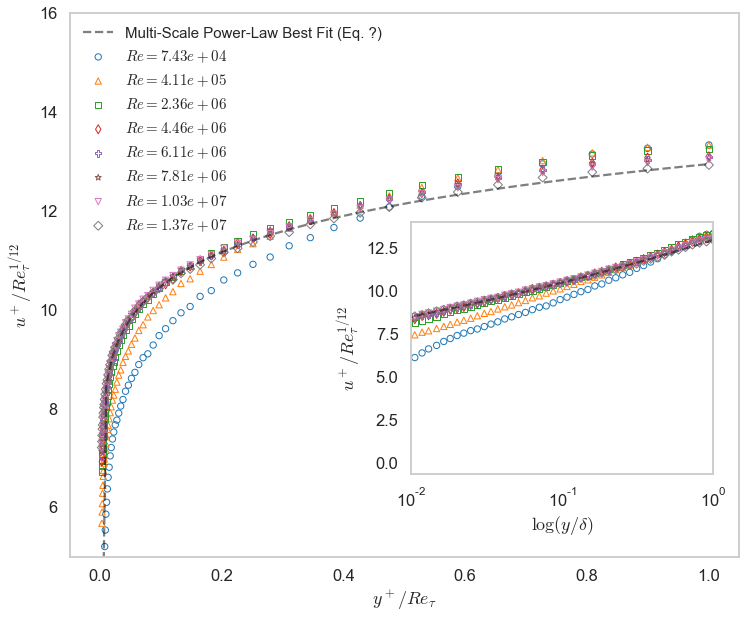

In [57]:
y_1=np.linspace(0,1,num=100)
u_gabriel = func_kolmo_viscous(y_1, C_viscous_kolmo, E_viscous_kolmo)

fig, ax1 = plt.subplots(figsize=(12, 10))

selection = [0,7,16,19,21,22,24,25]

left, bottom, width, height = [0.52, 0.24, 0.35, 0.35] 
ax2 = fig.add_axes([left, bottom, width, height])

colors = matplotlib.cm.tab10(np.linspace(0, 1, 10))
markers=['o','^','s','d','P','*','v','D']

line_width = 1

j=0
for i in selection:
    if i==25:
        ax1.scatter(y__[i][:-1] , u__[i][:-1] , alpha = 1, s=40 ,linewidth = line_width, facecolors = 'none' , color = colors[7] , marker = 'D', label = r'$Re= $'+r'${:.2e}$'.format(re__[i]))
    else:
        ax1.scatter(y__[i][:-1] , u__[i][:-1] , alpha = 1, s=40 ,linewidth = line_width, facecolors = 'none' , color = colors[j] , marker = markers[j%len(markers)], label = r'$Re= $'+r'${:.2e}$'.format(re__[i]))
        j+=1

j=0
for i in selection:
    ax2.scatter(y__[i][:-1] , u__[i][:-1] , alpha = 1, s=40 , linewidth = line_width, facecolors = 'none', color = colors[j] , marker = markers[j%len(markers)], label = author[i]+', Re='+'{:.2e}'.format(re__[i]))
    j+=1

ax1.plot(y_1, u_gabriel, 'k--', alpha = 0.5, label = "Multi-Scale Power-Law Best Fit (Eq. ?)")
ax2.plot(y_1, u_gabriel, 'k--', alpha = 0.5, label = 'Best Fit')

ax1.legend(loc = 'upper left', fontsize = 'small', edgecolor = 'white', framealpha = 0)
ax1.set_xlabel(r"$y^+/Re_\tau$")
ax1.set_ylabel(r'$u^+/Re_\tau^{1/12}$')
ax1.set_ylim([5,16])
ax1.grid(False)
ax2.set_xlabel(r"$\log(y/\delta)$")
ax2.set_ylabel(r'$u^+/Re_\tau^{1/12}$')
ax2.set_xscale('log')
ax2.set_xlim([0.01,1])
ax2.grid(False)
plt.savefig('SB_McKeon_Fit_viscous_kolmo.pdf', format='pdf', dpi=1200)
plt.show()

## Fit Meso-Kolmo

In [58]:
ig_low=2.6; ig_high=0.9

u_= np.array(dfSB10M_M['U+'])
y_= np.array(dfSB10M_M['y+'])

slice_ = (y_>=(ig_low*re_tau[-2]**0.5))&(y_<=(ig_high*re_tau[-2]))
y_ = y__[-2][slice_]
u_ = u__[-2][slice_]

D_kolmo_meso, E_kolmo_meso = np.linalg.lstsq(make_gabriel_matrix_extreme_kolmo_meso(y_),u_,rcond=None)[0]
print(D_kolmo_meso, E_kolmo_meso)

-2.504399867846156 15.430956673008852


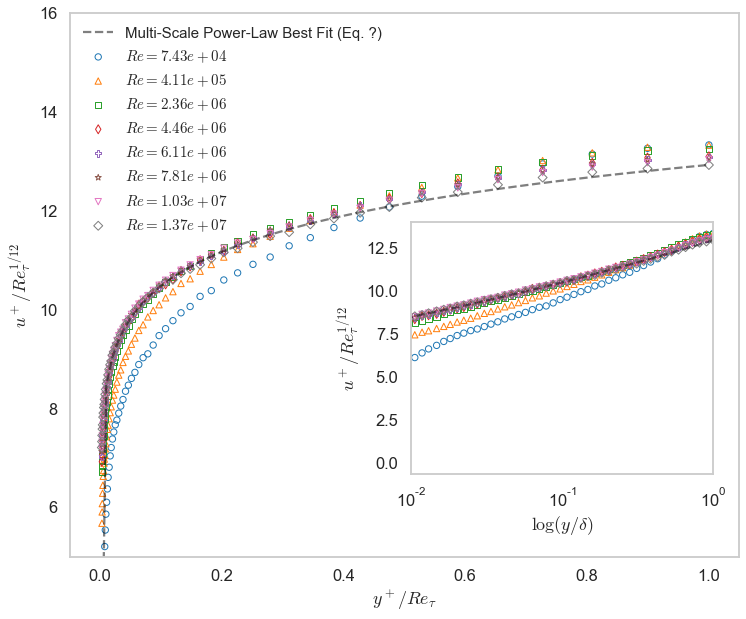

In [59]:
y_1=np.linspace(0,1,num=100)
u_gabriel = func_kolmo_meso(y_1, D_kolmo_meso, E_kolmo_meso)

fig, ax1 = plt.subplots(figsize=(12, 10))

selection = [0,7,16,19,21,22,24,25]

left, bottom, width, height = [0.52, 0.24, 0.35, 0.35] 
ax2 = fig.add_axes([left, bottom, width, height])

colors = matplotlib.cm.tab10(np.linspace(0, 1, 10))
markers=['o','^','s','d','P','*','v','D']

line_width = 1

j=0
for i in selection:
    if i==25:
        ax1.scatter(y__[i][:-1] , u__[i][:-1] , alpha = 1, s=40 ,linewidth = line_width, facecolors = 'none' , color = colors[7] , marker = 'D', label = r'$Re= $'+r'${:.2e}$'.format(re__[i]))
    else:
        ax1.scatter(y__[i][:-1] , u__[i][:-1] , alpha = 1, s=40 ,linewidth = line_width, facecolors = 'none' , color = colors[j] , marker = markers[j%len(markers)], label = r'$Re= $'+r'${:.2e}$'.format(re__[i]))
        j+=1

j=0
for i in selection:
    ax2.scatter(y__[i][:-1] , u__[i][:-1] , alpha = 1, s=40 , linewidth = line_width, facecolors = 'none', color = colors[j] , marker = markers[j%len(markers)], label = author[i]+', Re='+'{:.2e}'.format(re__[i]))
    j+=1

ax1.plot(y_1, u_gabriel, 'k--', alpha = 0.5, label = "Multi-Scale Power-Law Best Fit (Eq. ?)")
ax2.plot(y_1, u_gabriel, 'k--', alpha = 0.5, label = 'Best Fit')

ax1.legend(loc = 'upper left', fontsize = 'small', edgecolor = 'white', framealpha = 0)
ax1.set_xlabel(r"$y^+/Re_\tau$")
ax1.set_ylabel(r'$u^+/Re_\tau^{1/12}$')
ax1.set_ylim([5,16])
ax1.grid(False)
ax2.set_xlabel(r"$\log(y/\delta)$")
ax2.set_ylabel(r'$u^+/Re_\tau^{1/12}$')
ax2.set_xscale('log')
ax2.set_xlim([0.01,1])
ax2.grid(False)
plt.savefig('SB_McKeon_Fit_kolmo_meso.pdf', format='pdf', dpi=1200)
plt.show()

In [60]:
alpha = np.random.uniform(0,1,1)[0]
beta = np.random.uniform(0,1,1)[0]

ig_low=2.6; ig_high=0.9

u_= np.array(dfSB10M_M['U+'])
y_= np.array(dfSB10M_M['y+'])

slice_ = (y_>=(ig_low*re_tau[-2]**0.5))&(y_<=(ig_high*re_tau[-2]))
y_ = y__[-2][slice_]
u_ = u__[-2][slice_]

C_random, D_random = np.linalg.lstsq(make_gabriel_matrix_random(y_, alpha, beta),u_,rcond=None)[0]
print(C_random, D_random)

111.13244443345346 -101.56671975485047


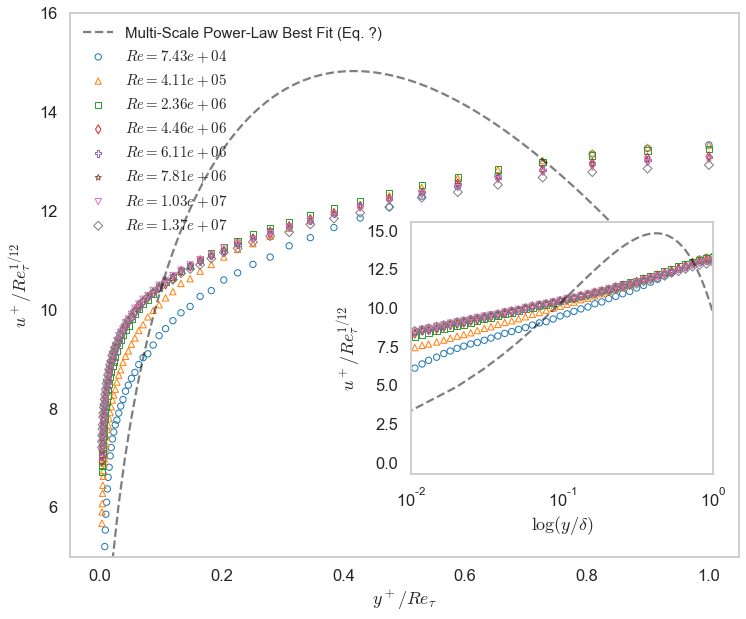

In [61]:
y_1=np.linspace(0,1,num=100)
u_gabriel = func_random(y_1, C_random, D_random, alpha, beta)

fig, ax1 = plt.subplots(figsize=(12, 10))

selection = [0,7,16,19,21,22,24,25]

left, bottom, width, height = [0.52, 0.24, 0.35, 0.35] 
ax2 = fig.add_axes([left, bottom, width, height])

colors = matplotlib.cm.tab10(np.linspace(0, 1, 10))
markers=['o','^','s','d','P','*','v','D']

line_width = 1

j=0
for i in selection:
    if i==25:
        ax1.scatter(y__[i][:-1] , u__[i][:-1] , alpha = 1, s=40 ,linewidth = line_width, facecolors = 'none' , color = colors[7] , marker = 'D', label = r'$Re= $'+r'${:.2e}$'.format(re__[i]))
    else:
        ax1.scatter(y__[i][:-1] , u__[i][:-1] , alpha = 1, s=40 ,linewidth = line_width, facecolors = 'none' , color = colors[j] , marker = markers[j%len(markers)], label = r'$Re= $'+r'${:.2e}$'.format(re__[i]))
        j+=1

j=0
for i in selection:
    ax2.scatter(y__[i][:-1] , u__[i][:-1] , alpha = 1, s=40 , linewidth = line_width, facecolors = 'none', color = colors[j] , marker = markers[j%len(markers)], label = author[i]+', Re='+'{:.2e}'.format(re__[i]))
    j+=1

ax1.plot(y_1, u_gabriel, 'k--', alpha = 0.5, label = "Multi-Scale Power-Law Best Fit (Eq. ?)")
ax2.plot(y_1, u_gabriel, 'k--', alpha = 0.5, label = 'Best Fit')

ax1.legend(loc = 'upper left', fontsize = 'small', edgecolor = 'white', framealpha = 0)
ax1.set_xlabel(r"$y^+/Re_\tau$")
ax1.set_ylabel(r'$u^+/Re_\tau^{1/12}$')
ax1.set_ylim([5,16])
ax1.grid(False)
ax2.set_xlabel(r"$\log(y/\delta)$")
ax2.set_ylabel(r'$u^+/Re_\tau^{1/12}$')
ax2.set_xscale('log')
ax2.set_xlim([0.01,1])
ax2.grid(False)
plt.savefig('SB_McKeon_Fit_random.pdf', format='pdf', dpi=1200)
plt.show()

In [62]:
print(alpha, beta)

0.6669612968501837 0.8764445743860683


In [63]:
ig_low=2.6; ig_high=0.9

u_= np.array(dfSB10M_M['U+'])
y_= np.array(dfSB10M_M['y+'])

slice_ = (y_>=(ig_low*re_tau[-2]**0.5))&(y_<=(ig_high*re_tau[-2]))
y_ = y__[-2][slice_]
u_ = u__[-2][slice_]

gamma, logC_mono = np.linalg.lstsq(make_gabriel_matrix_random_mono(y_),np.log(u_),rcond=None)[0]
print(gamma, logC_mono)

0.09207138326669333 2.560534493231057


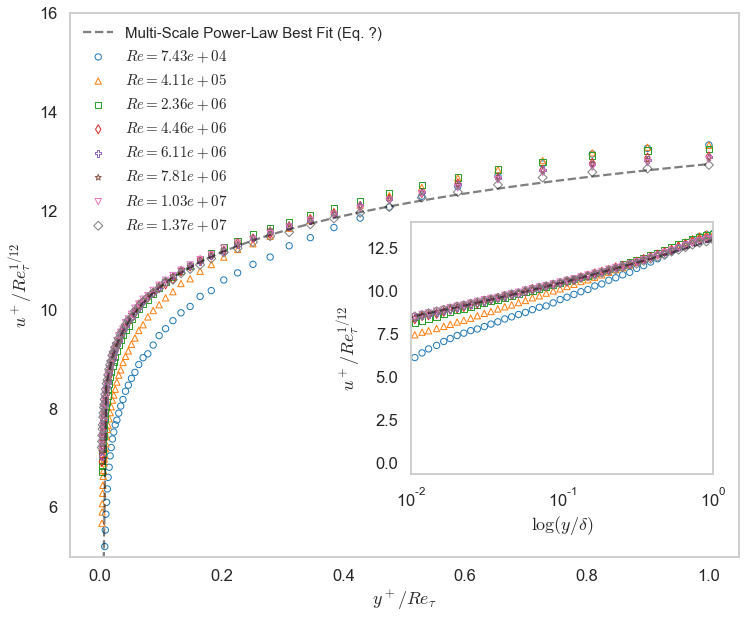

In [64]:
y_1=np.linspace(0,1,num=100)
C_mono = np.exp(logC_mono)
u_gabriel = func_random_mono(y_1, C_mono, gamma)

fig, ax1 = plt.subplots(figsize=(12, 10))

selection = [0,7,16,19,21,22,24,25]

left, bottom, width, height = [0.52, 0.24, 0.35, 0.35] 
ax2 = fig.add_axes([left, bottom, width, height])

colors = matplotlib.cm.tab10(np.linspace(0, 1, 10))
markers=['o','^','s','d','P','*','v','D']

line_width = 1

j=0
for i in selection:
    if i==25:
        ax1.scatter(y__[i][:-1] , u__[i][:-1] , alpha = 1, s=40 ,linewidth = line_width, facecolors = 'none' , color = colors[7] , marker = 'D', label = r'$Re= $'+r'${:.2e}$'.format(re__[i]))
    else:
        ax1.scatter(y__[i][:-1] , u__[i][:-1] , alpha = 1, s=40 ,linewidth = line_width, facecolors = 'none' , color = colors[j] , marker = markers[j%len(markers)], label = r'$Re= $'+r'${:.2e}$'.format(re__[i]))
        j+=1

j=0
for i in selection:
    ax2.scatter(y__[i][:-1] , u__[i][:-1] , alpha = 1, s=40 , linewidth = line_width, facecolors = 'none', color = colors[j] , marker = markers[j%len(markers)], label = author[i]+', Re='+'{:.2e}'.format(re__[i]))
    j+=1

ax1.plot(y_1, u_gabriel, 'k--', alpha = 0.5, label = "Multi-Scale Power-Law Best Fit (Eq. ?)")
ax2.plot(y_1, u_gabriel, 'k--', alpha = 0.5, label = 'Best Fit')

ax1.legend(loc = 'upper left', fontsize = 'small', edgecolor = 'white', framealpha = 0)
ax1.set_xlabel(r"$y^+/Re_\tau$")
ax1.set_ylabel(r'$u^+/Re_\tau^{1/12}$')
ax1.set_ylim([5,16])
ax1.grid(False)
ax2.set_xlabel(r"$\log(y/\delta)$")
ax2.set_ylabel(r'$u^+/Re_\tau^{1/12}$')
ax2.set_xscale('log')
ax2.set_xlim([0.01,1])
ax2.grid(False)
plt.savefig('SB_McKeon_Fit_random_mono.pdf', format='pdf', dpi=1200)
plt.show()

## Most General Fit (Any constant or exponent)

In [86]:
ig_low=2.6; ig_high=0.9

u_= np.array(dfSB10M_M['U+'])
y_= np.array(dfSB10M_M['y+'])

slice_ = (y_>=(ig_low*re_tau[-2]**0.5))&(y_<=(ig_high*re_tau[-2]))
y_ = np.array(y__[-3][slice_])
u_ = np.array(u_bar[-3][slice_])

objective = lambda x: np.sum((u_ - x[0]*(y_**x[2]) + x[1]*(y_**x[3]))**2)

x0 = np.random.uniform(size = (1,4))[0]

res = scipy.optimize.minimize(objective, x0)
print(x0)
print(res.x)

[0.56431527 0.95642159 0.94680582 0.22155656]
[1.14696998 0.0060669  0.0946872  0.83118986]


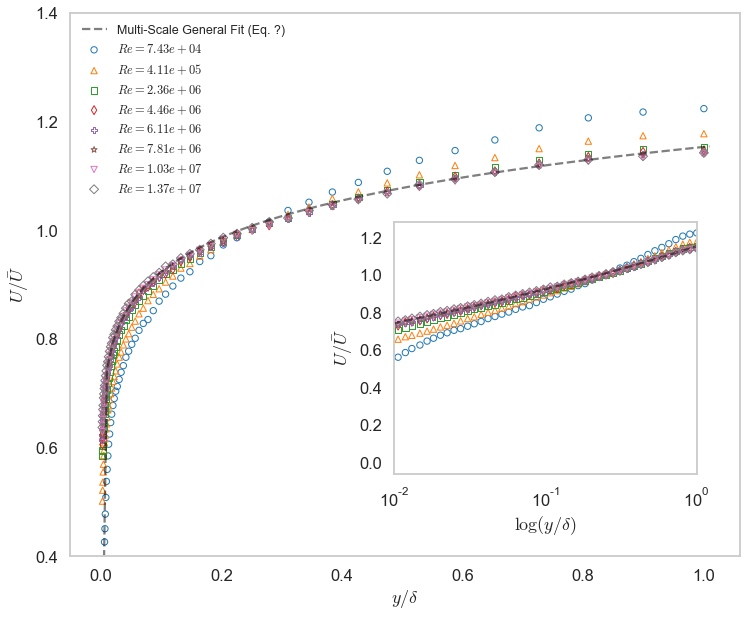

In [88]:
C_1 = res.x[0]
C_2 = res.x[1]
lambda_1 = res.x[2]
lambda_2 = res.x[3]

y_1=np.linspace(0,1.01,num=100)
u_gabriel = C_1*(y_1**lambda_1) + C_2*(y_1**lambda_2)

selection = [0,7,16,19,21,22,24,25]

fig, ax1 = plt.subplots(figsize=(12, 10))

left, bottom, width, height = [0.5, 0.24, 0.35, 0.35] 
ax2 = fig.add_axes([left, bottom, width, height])

colors = matplotlib.cm.tab10(np.linspace(0, 1, 10))
markers=['o','^','s','d','P','*','v','D','h']

line_width = 1

j=0
for i in selection:
    ax1.scatter(y__[i][:-1] , u_bar[i][:-1], alpha = 1, s=40 , linewidth = line_width , facecolors='none', color = colors[j], marker = markers[j], label = r'$Re=$'+r'${:.2e}$'.format(re__[i]))
    j+=1

j=0
for i in selection:
    ax2.scatter(y__[i][:-1] , u_bar[i][:-1], alpha = 1, s=40 , linewidth = line_width, facecolors = 'none', color = colors[j] , marker = markers[j], label = ', Re= '+'{:.2e}'.format(re__[i]))
    j+=1
    
ax1.plot(y_1, u_gabriel, 'k--', alpha = 0.5, label = "Multi-Scale General Fit (Eq. ?)")
ax2.plot(y_1, u_gabriel, 'k--', alpha = 0.5, label = 'Best Fit')

ax1.legend(loc = 'upper left', fontsize = 'x-small', edgecolor = 'white', framealpha = 0)
ax1.set_xlabel(r"$y/\delta$")
ax1.set_ylabel(r'$U/\bar{U}$')
ax1.set_ylim([0.4,1.4])
ax1.grid(False)
ax2.set_xlabel(r"$\log(y/\delta)$")
ax2.set_ylabel(r'$U/\bar{U}$')
ax2.set_xscale('log')
ax2.set_xlim([0.01,1])
ax2.grid(False)
plt.savefig('SB_McKeon_ubar_general.pdf', format='pdf', dpi=1200)
plt.show()